## Notebook 1 for testing workflow and show results as tables

In [1]:
from uqlca.calculator.do_probabilistic_lca_calculator import DesignOptionProbabilisticLCACalculator
from uqlca.calculator.deterministic_calculator import LCACalculator
from uqlca.general.generate_designs import create_layers, create_design_options, create_emission_factors
from uqlca.general.load_input import load_data
from uqlca.visualizations.old_visualizations import plot_overall_lca_distributions
from uqlca.general.statistical_results import calculate_statistical_parameters, display_statistical_table
from uqlca.general.statistical_results import convert_statistical_data_to_table
from uqlca.visualizations.do_visualizations import prepare_boxplot_data, create_boxplots_from_raw_data, plot_heatmaps, plot_gwp_boxplots_aggregated, plot_lca_distributions_by_design_option, plot_radar, plot_violin

import pandas as pd
import numpy as np

In [2]:
layers_data, emission_factors_data, design_options_data = load_data(
    "/Users/marlontheis/Desktop/UNIVERSITY/TU_BERLIN/Master_Thesis/master-thesis-project/uncertainty-project/uncertainty-quantification-lca/uqlca/data/layers.json",
    ["/Users/marlontheis/Desktop/UNIVERSITY/TU_BERLIN/Master_Thesis/master-thesis-project/uncertainty-project/uncertainty-quantification-lca/uqlca/data/ecoinvent_background_data.json", "/Users/marlontheis/Desktop/UNIVERSITY/TU_BERLIN/Master_Thesis/master-thesis-project/uncertainty-project/uncertainty-quantification-lca/uqlca/data/national_background_data.json", "/Users/marlontheis/Desktop/UNIVERSITY/TU_BERLIN/Master_Thesis/master-thesis-project/uncertainty-project/uncertainty-quantification-lca/uqlca/data/epd_background_data.json"],
    "/Users/marlontheis/Desktop/UNIVERSITY/TU_BERLIN/Master_Thesis/master-thesis-project/uncertainty-project/uncertainty-quantification-lca/uqlca/data/design_options.json"
)

## Create the instances of layers, design options and emission factors
layers = create_layers(layers_data)
emission_factors_ecoinvent = create_emission_factors(emission_factors_data[0])
emission_factors_national = create_emission_factors(emission_factors_data[1])
emission_factors_epd = create_emission_factors(emission_factors_data[2])
design_options = create_design_options(layers, design_options_data)

print(layers)
print(emission_factors_ecoinvent)
print(design_options)

[Layer(name='asphalt_concrete_surface_course_bitumen', abbreviation='acscb', materials=[Material(name='aggregates', composition=0.3318, transport_distance_a2=40, mass_a2=331.8), Material(name='aggregates', composition=0.4029, transport_distance_a2=40, mass_a2=402.9), Material(name='filler', composition=0.2133, transport_distance_a2=40, mass_a2=213.3), Material(name='bitumen', composition=0.052, transport_distance_a2=150, mass_a2=52)], energy_used_a3='thermal_energy', energy_consumption_a3=76.111, transport_distance_a4=40, mass_a4=1, construction_a5=[Equipment(name='mid_range_asphalt_paver', number=1, productivity=1000, productivity_unit='t/h', energy_type='diesel', energy=15, energy_unit='L/h'), Equipment(name='pneumatic_tyre_roller_for_compaction', number=2, productivity=1890, productivity_unit='m2/h', energy_type='diesel', energy=12.4, energy_unit='L/h'), Equipment(name='tandem_vibratory_roller', number=2, productivity=1122, productivity_unit='m2/h', energy_type='diesel', energy=6.9,

In [13]:
## Probabilistic LCA on design option level - ECOINVENT
do_probabilistic_lca_calculator = DesignOptionProbabilisticLCACalculator(layers=layers, emission_factors=emission_factors_ecoinvent, design_options=design_options, length_road=3.39)
db1_probabilistic_results = do_probabilistic_lca_calculator.calculate_do_probabilistic_impact(n_samples=1000)
aggregated_db1_results = do_probabilistic_lca_calculator.collect_aggregated_data(db1_probabilistic_results)
full_db1_results = do_probabilistic_lca_calculator.collect_overall_aggregated_data(db1_probabilistic_results)

## Probabilistic LCA on design option level - NATIONAL
do_probabilistic_lca_calculator = DesignOptionProbabilisticLCACalculator(layers=layers, emission_factors=emission_factors_national, design_options=design_options, length_road=3.39)
db2_probabilistic_results = do_probabilistic_lca_calculator.calculate_do_probabilistic_impact(n_samples=1000)
aggregated_db2_results = do_probabilistic_lca_calculator.collect_aggregated_data(db2_probabilistic_results)
full_db2_results = do_probabilistic_lca_calculator.collect_overall_aggregated_data(db2_probabilistic_results)

## Probabilistic LCA on design option level - EPD
do_probabilistic_lca_calculator = DesignOptionProbabilisticLCACalculator(layers=layers, emission_factors=emission_factors_epd, design_options=design_options, length_road=3.39)
db3_probabilistic_results = do_probabilistic_lca_calculator.calculate_do_probabilistic_impact(n_samples=1000)
aggregated_db3_results = do_probabilistic_lca_calculator.collect_aggregated_data(db3_probabilistic_results)
full_db3_results = do_probabilistic_lca_calculator.collect_overall_aggregated_data(db3_probabilistic_results)

aggregated_results = [aggregated_db1_results, aggregated_db2_results, aggregated_db3_results]
print(aggregated_db1_results)

full_results = [full_db1_results, full_db2_results, full_db3_results]

Calculating probabilistic LCA for Design Option: base_design
Calculating probabilistic LCA for Design Option: alternative_design1
Calculating probabilistic LCA for Design Option: alternative_design2
Calculating probabilistic LCA for Design Option: base_design
Calculating probabilistic LCA for Design Option: alternative_design1
Calculating probabilistic LCA for Design Option: alternative_design2
Calculating probabilistic LCA for Design Option: base_design
Calculating probabilistic LCA for Design Option: alternative_design1
Calculating probabilistic LCA for Design Option: alternative_design2
{'base_design': {'A1': {'gwp_total': [3514464.1190861575, 3258690.7697750414, 3294089.075294006, 3079113.071052702, 2498763.0823984747, 3558610.472268382, 2784787.3683564505, 3574174.3230337836, 2614944.0389042627, 3123227.7566010645, 3299774.6803498627, 3114735.4719680944, 2959548.5238768132, 3130965.998729191, 3121034.1521713007, 2709944.29929604, 3260024.1383210258, 2912260.1481044684, 2639168.551

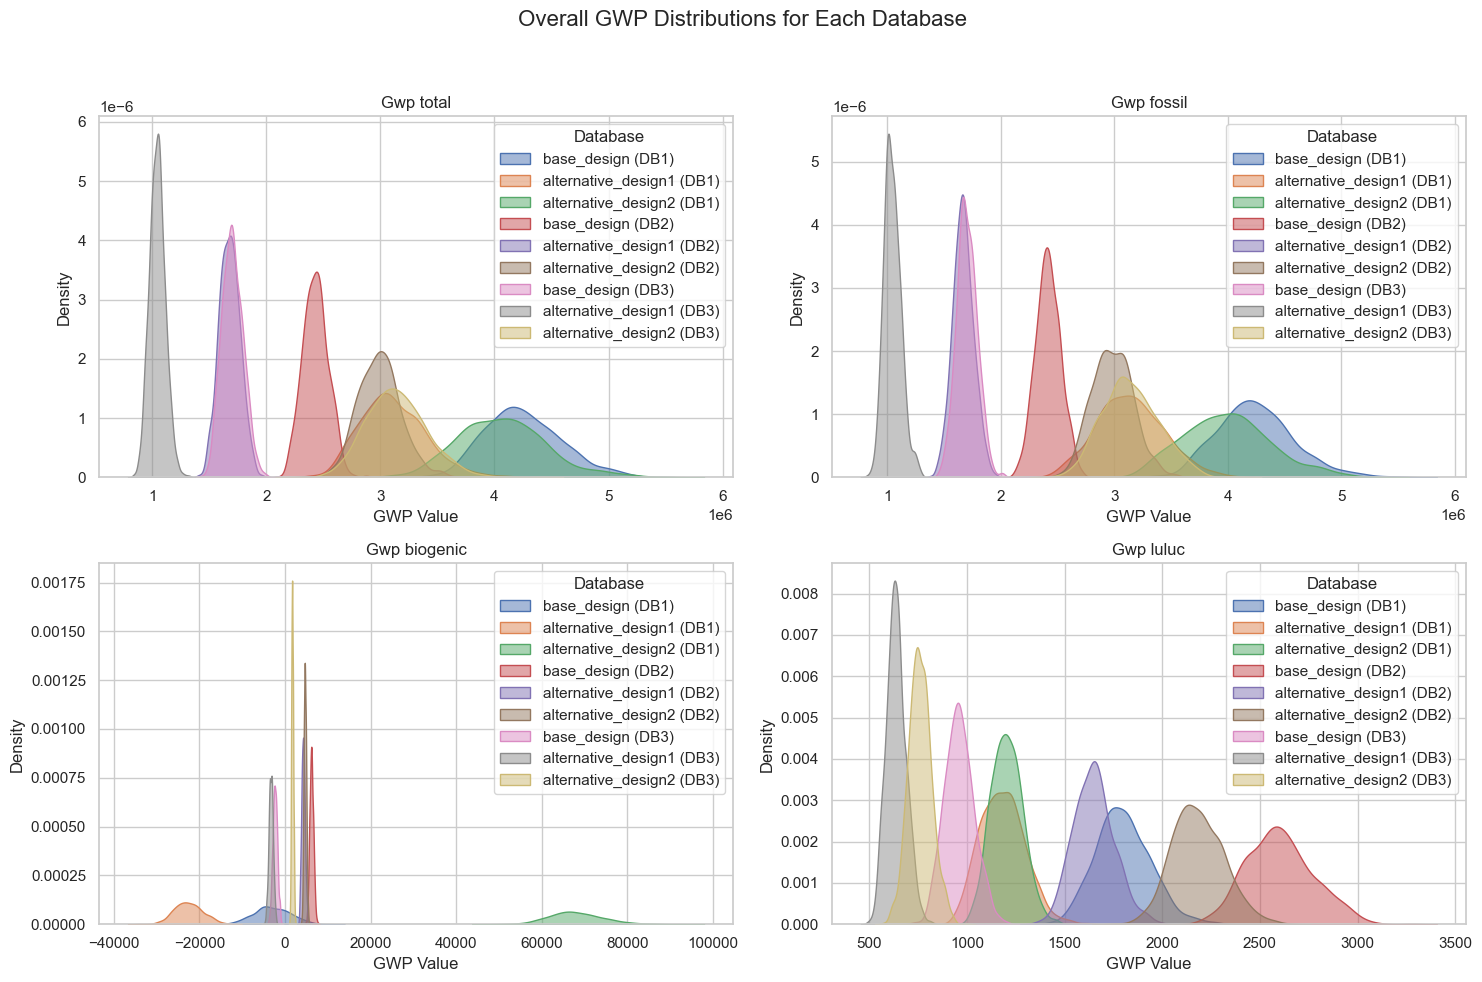

In [4]:
plot_overall_lca_distributions(full_results)

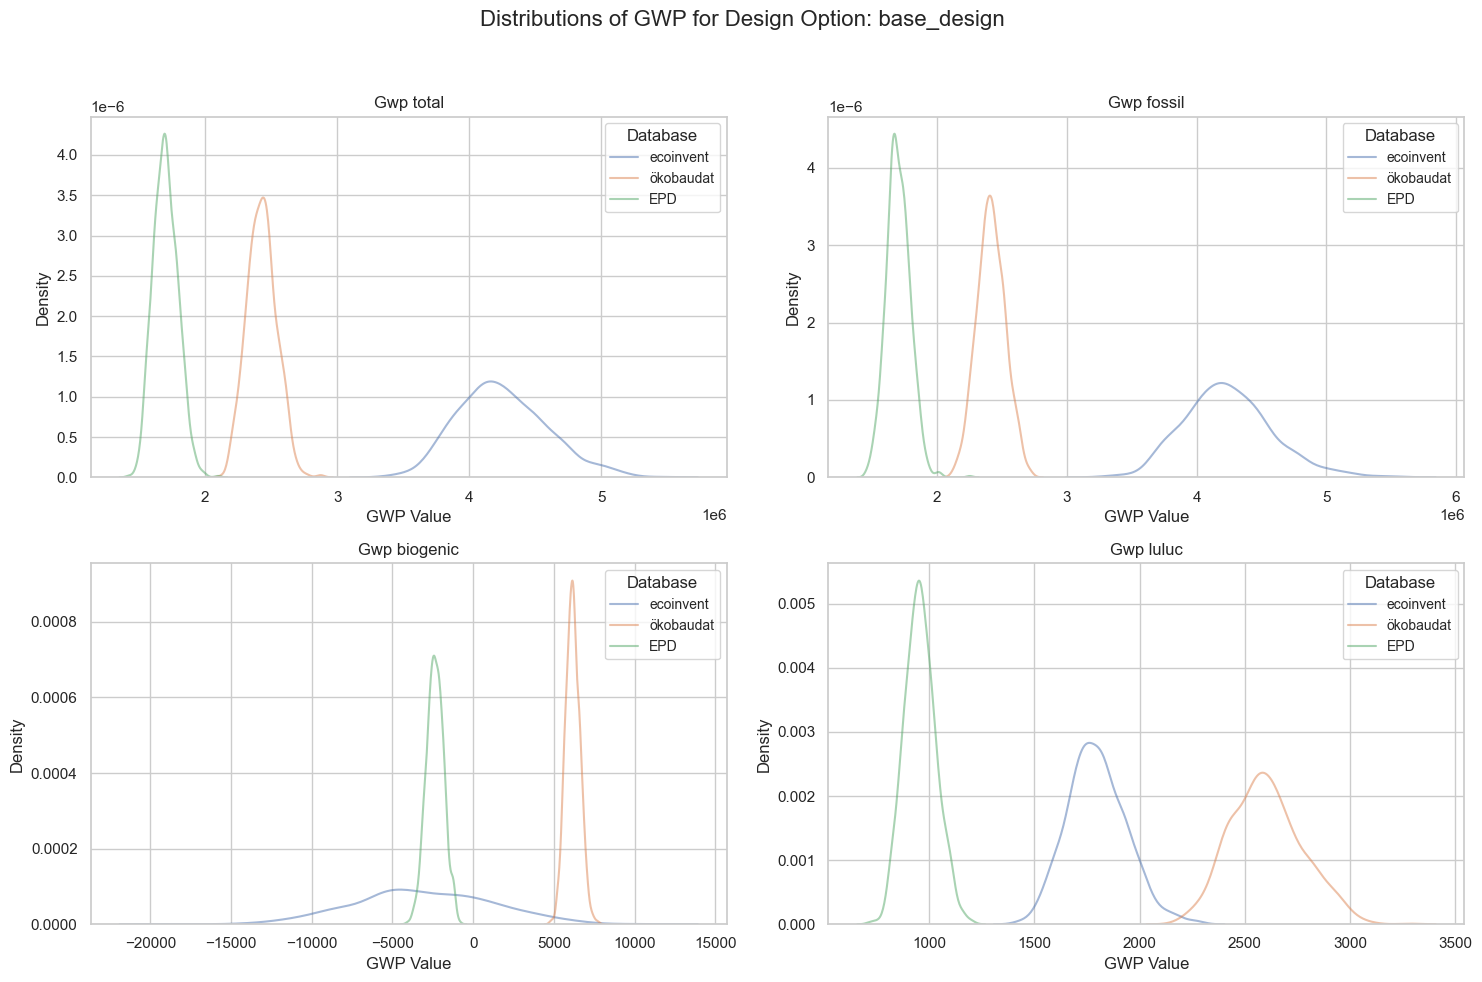

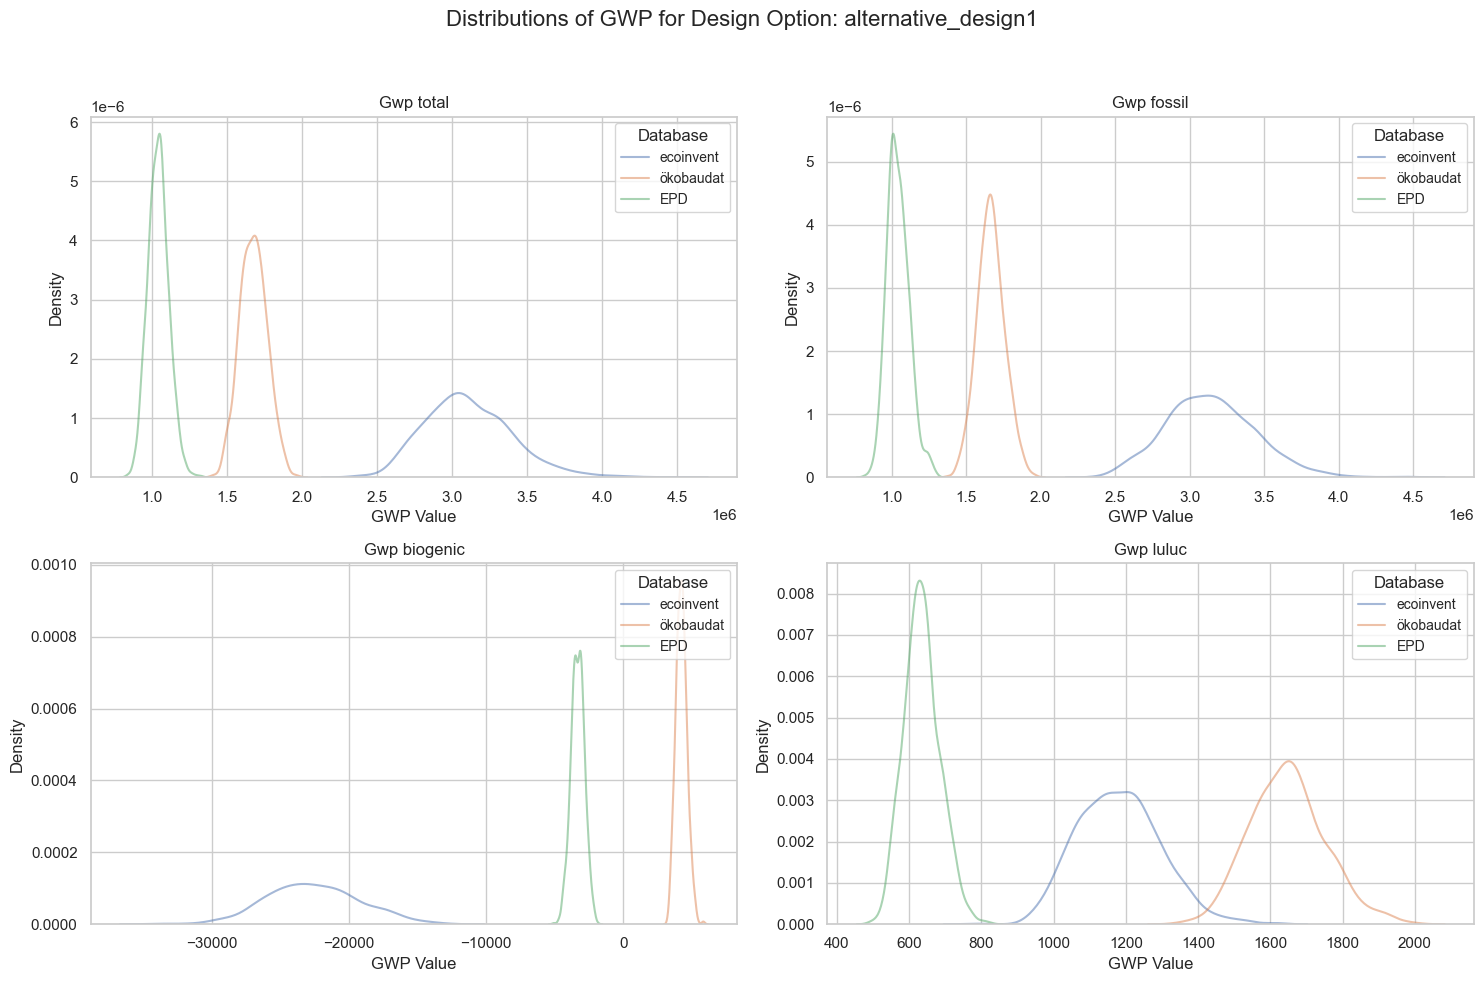

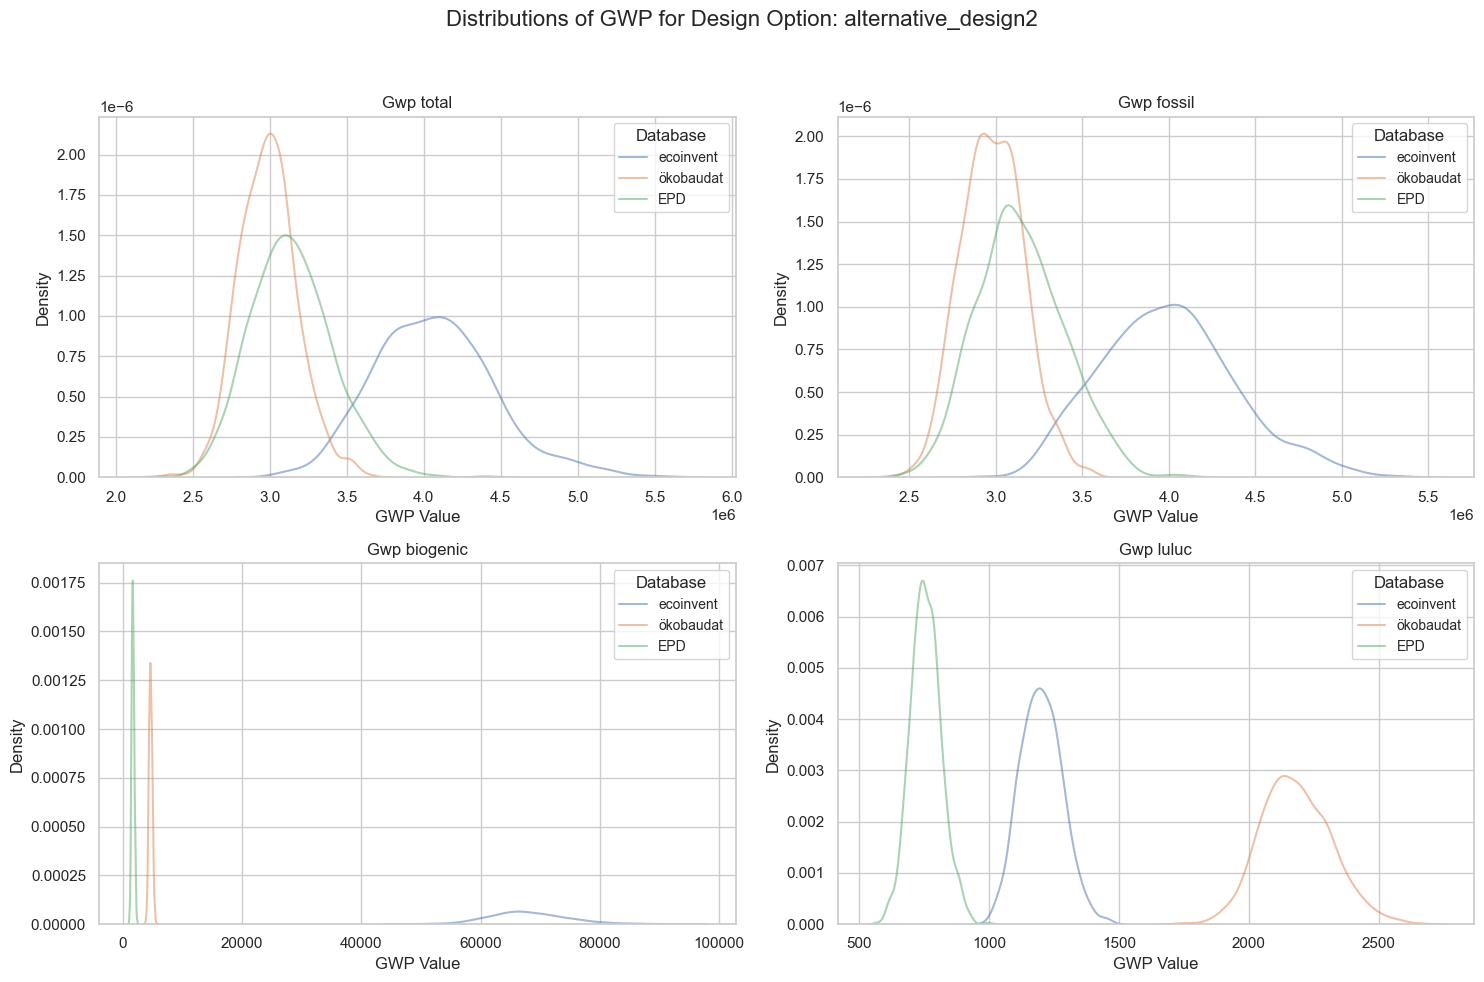

In [5]:
plot_lca_distributions_by_design_option(full_results)

In [6]:
## calculating statistical parameters for the probabilistic LCA results of the first design option for the databases
## include the name of the belonging database to present the results
db1_parameters = calculate_statistical_parameters(full_db1_results)
db2_parameters = calculate_statistical_parameters(full_db2_results)
db3_parameters = calculate_statistical_parameters(full_db3_results)
display_statistical_table(db1_parameters, 'ecoinvent')
display_statistical_table(db2_parameters, 'ökobaudat')
display_statistical_table(db3_parameters, 'EPD')

      Design Option  Database Impact Category          Mean           STD      COV           Min           Max  95th Percentile        Median       Unit  Outliers
        base_design ecoinvent       gwp_total  4.252015e+06 335471.205825 0.078897  3.350302e+06  5.478785e+06     4.854403e+06  4.228032e+06 kgCO2eq/FU         6
        base_design ecoinvent      gwp_fossil  4.243702e+06 339016.902256 0.079887  3.249348e+06  5.586320e+06     4.818877e+06  4.221528e+06 kgCO2eq/FU        18
        base_design ecoinvent    gwp_biogenic -3.057234e+03   4235.040479 1.385252 -1.871832e+04  1.072866e+04     3.925670e+03 -3.211753e+03 kgCO2eq/FU         4
        base_design ecoinvent       gwp_luluc  1.798535e+03    140.714947 0.078239  1.414607e+03  2.296463e+03     2.031009e+03  1.791235e+03 kgCO2eq/FU        13
alternative_design1 ecoinvent       gwp_total  3.110554e+06 290563.425770 0.093412  2.351133e+06  4.485548e+06     3.621372e+06  3.083040e+06 kgCO2eq/FU        13
alternative_design1 ec

In [7]:
# Example use case with hypothetical aggregated data dictionaries
# Replace full_db1_results, full_db2_results, full_db3_results with actual data
db1_parameters = calculate_statistical_parameters(full_db1_results)
db2_parameters = calculate_statistical_parameters(full_db2_results)
db3_parameters = calculate_statistical_parameters(full_db3_results)

# Convert the statistical data into DataFrames
df_db1 = convert_statistical_data_to_table(db1_parameters, 'ecoinvent')
df_db2 = convert_statistical_data_to_table(db2_parameters, 'ökobaudat')
df_db3 = convert_statistical_data_to_table(db3_parameters, 'EPD')

# Combine all DataFrames for comprehensive analysis or visualization
combined_df = pd.concat([df_db1, df_db2, df_db3], ignore_index=True)
# Save the combined DataFrame for later use (optional)
# combined_df.to_csv('statistical_results_N=1000.csv', index=False)


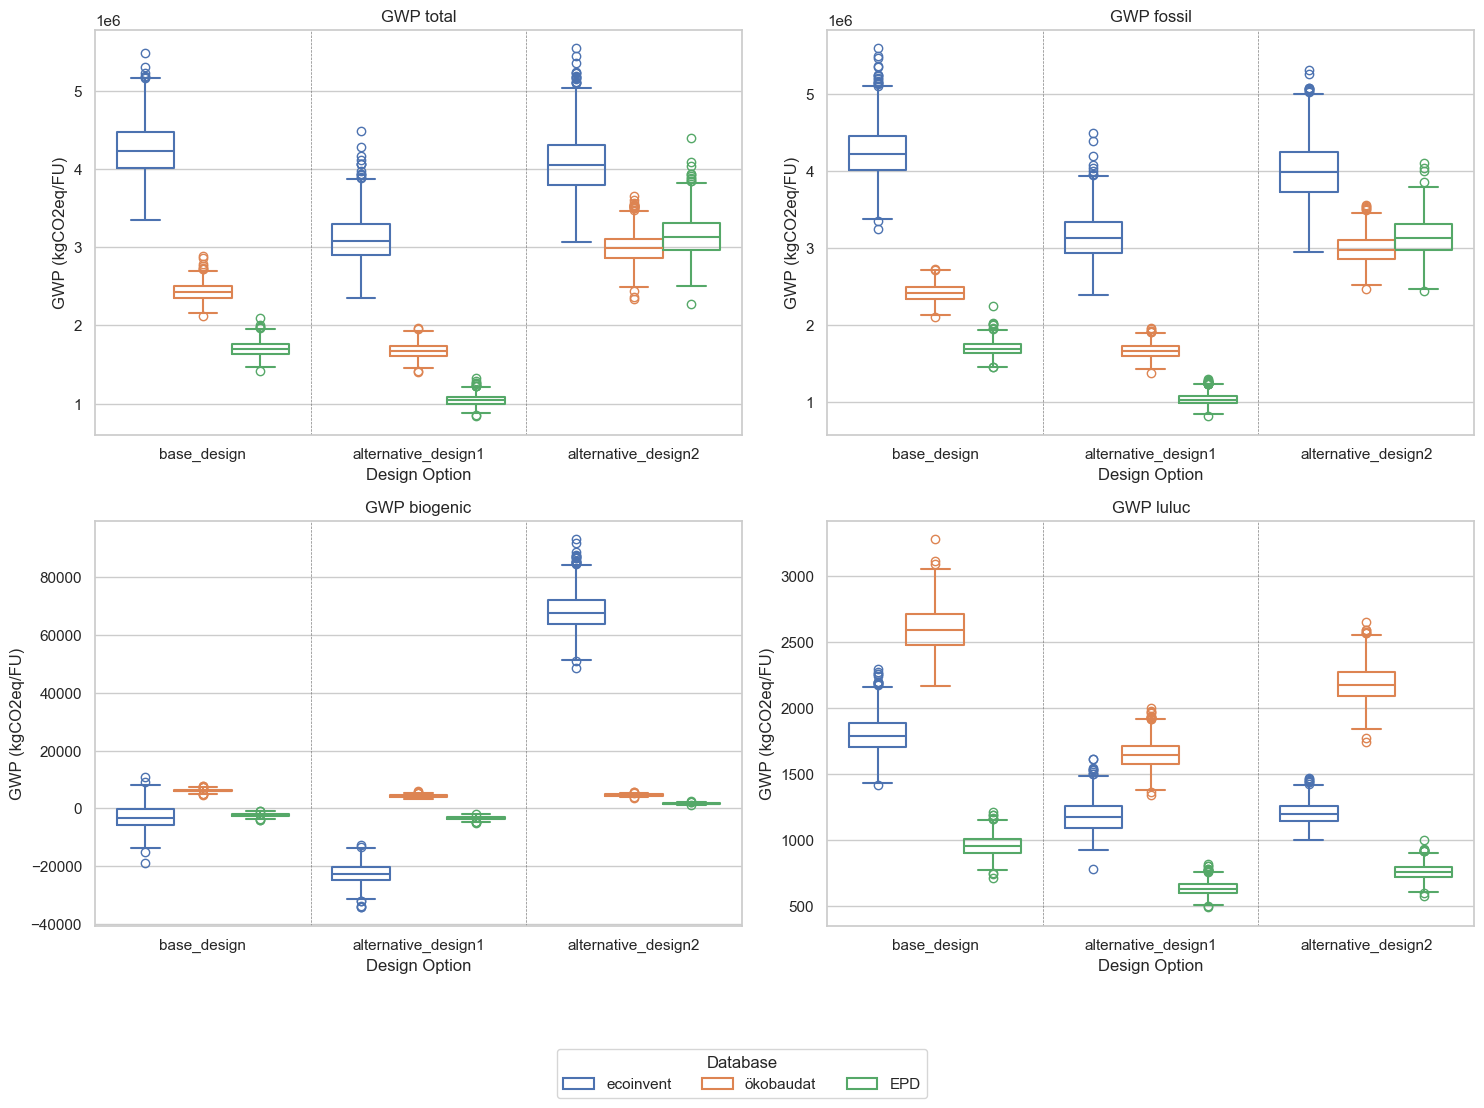

In [8]:
# Prepare raw data for all databases
boxplot_data_db1 = prepare_boxplot_data(full_db1_results, 'ecoinvent')
boxplot_data_db2 = prepare_boxplot_data(full_db2_results, 'ökobaudat')
boxplot_data_db3 = prepare_boxplot_data(full_db3_results, 'EPD')

# Combine all boxplot data into one DataFrame
boxplot_combined_data = pd.concat([boxplot_data_db1, boxplot_data_db2, boxplot_data_db3], ignore_index=True)

# Call the function to create boxplots
create_boxplots_from_raw_data(boxplot_combined_data)


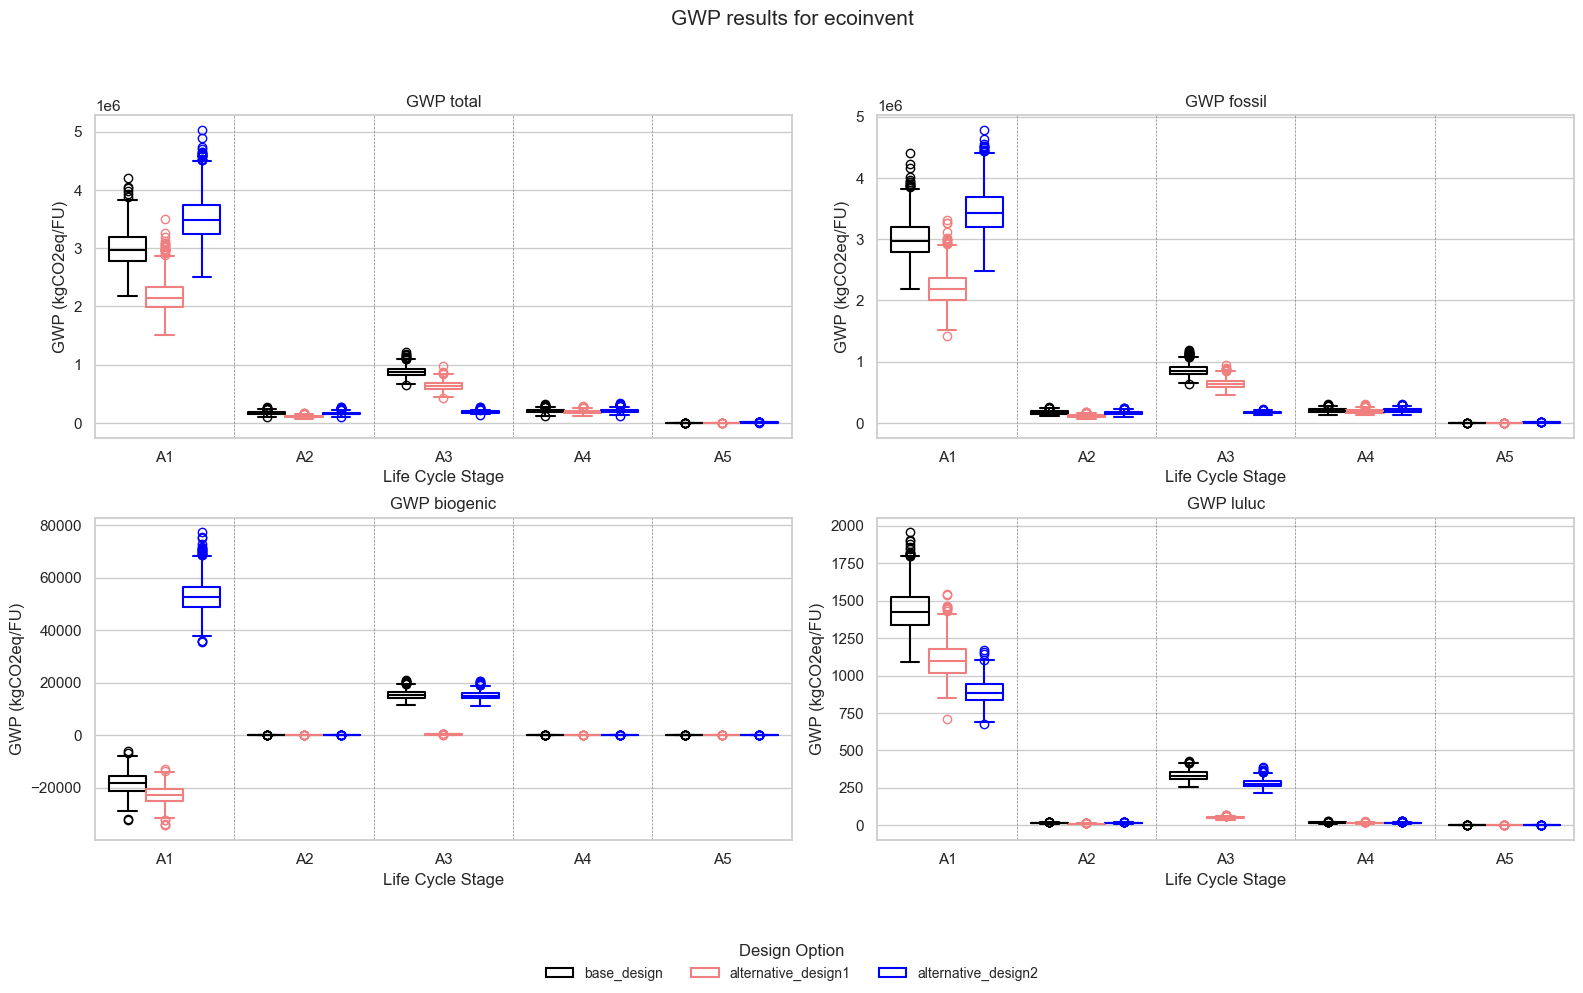

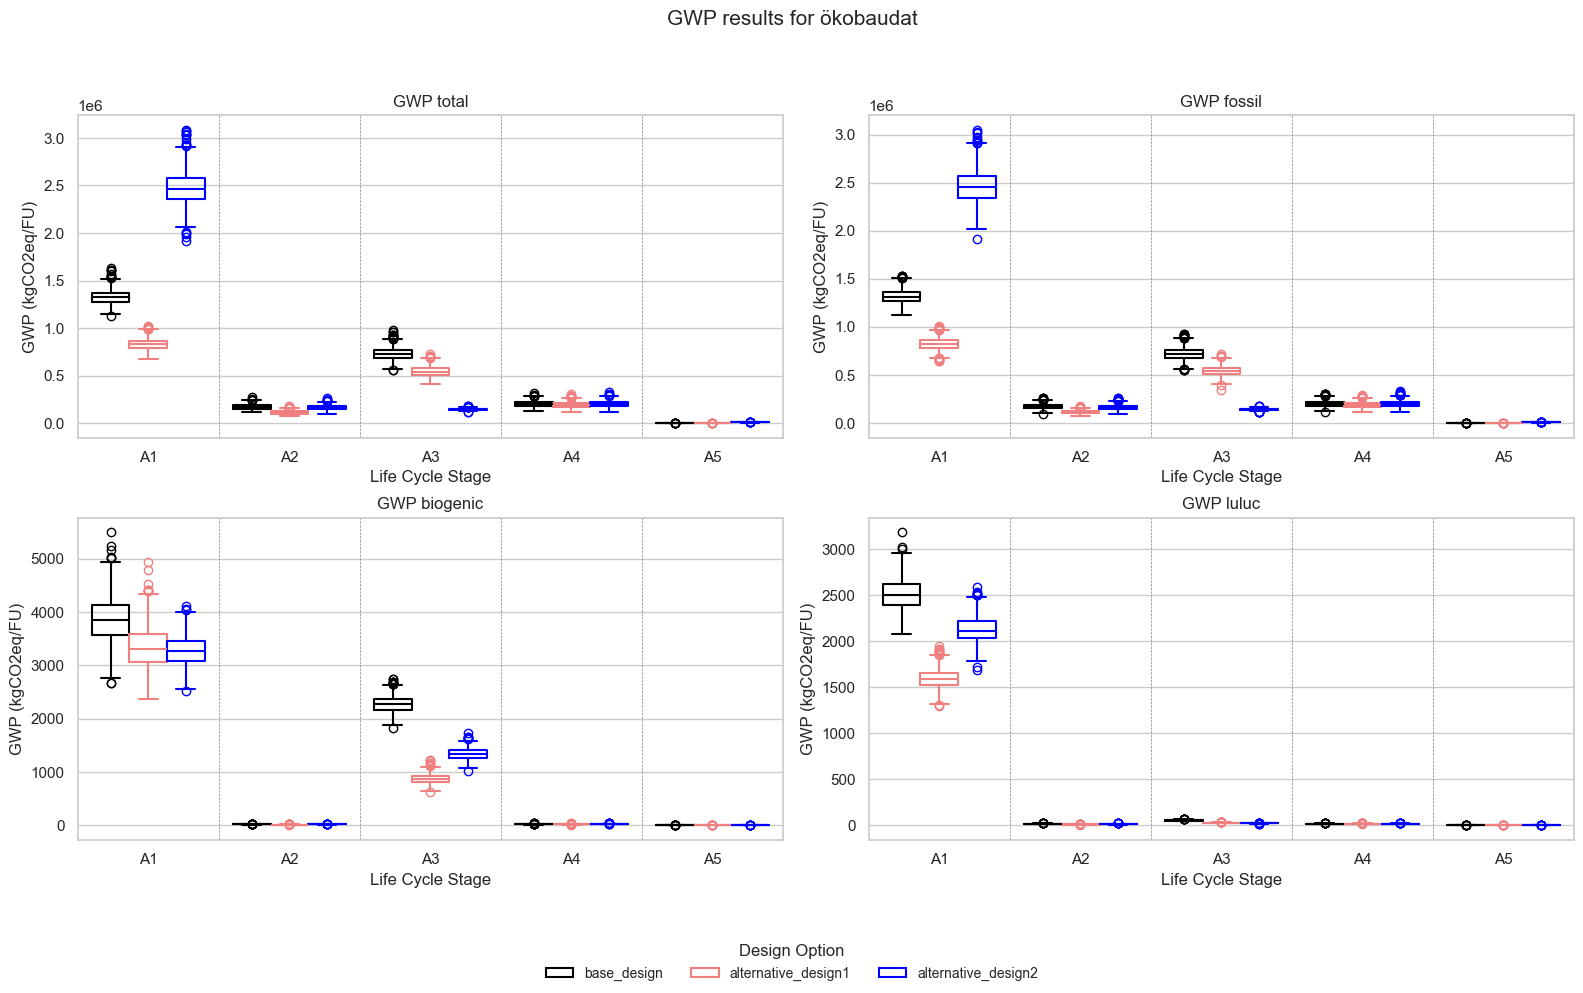

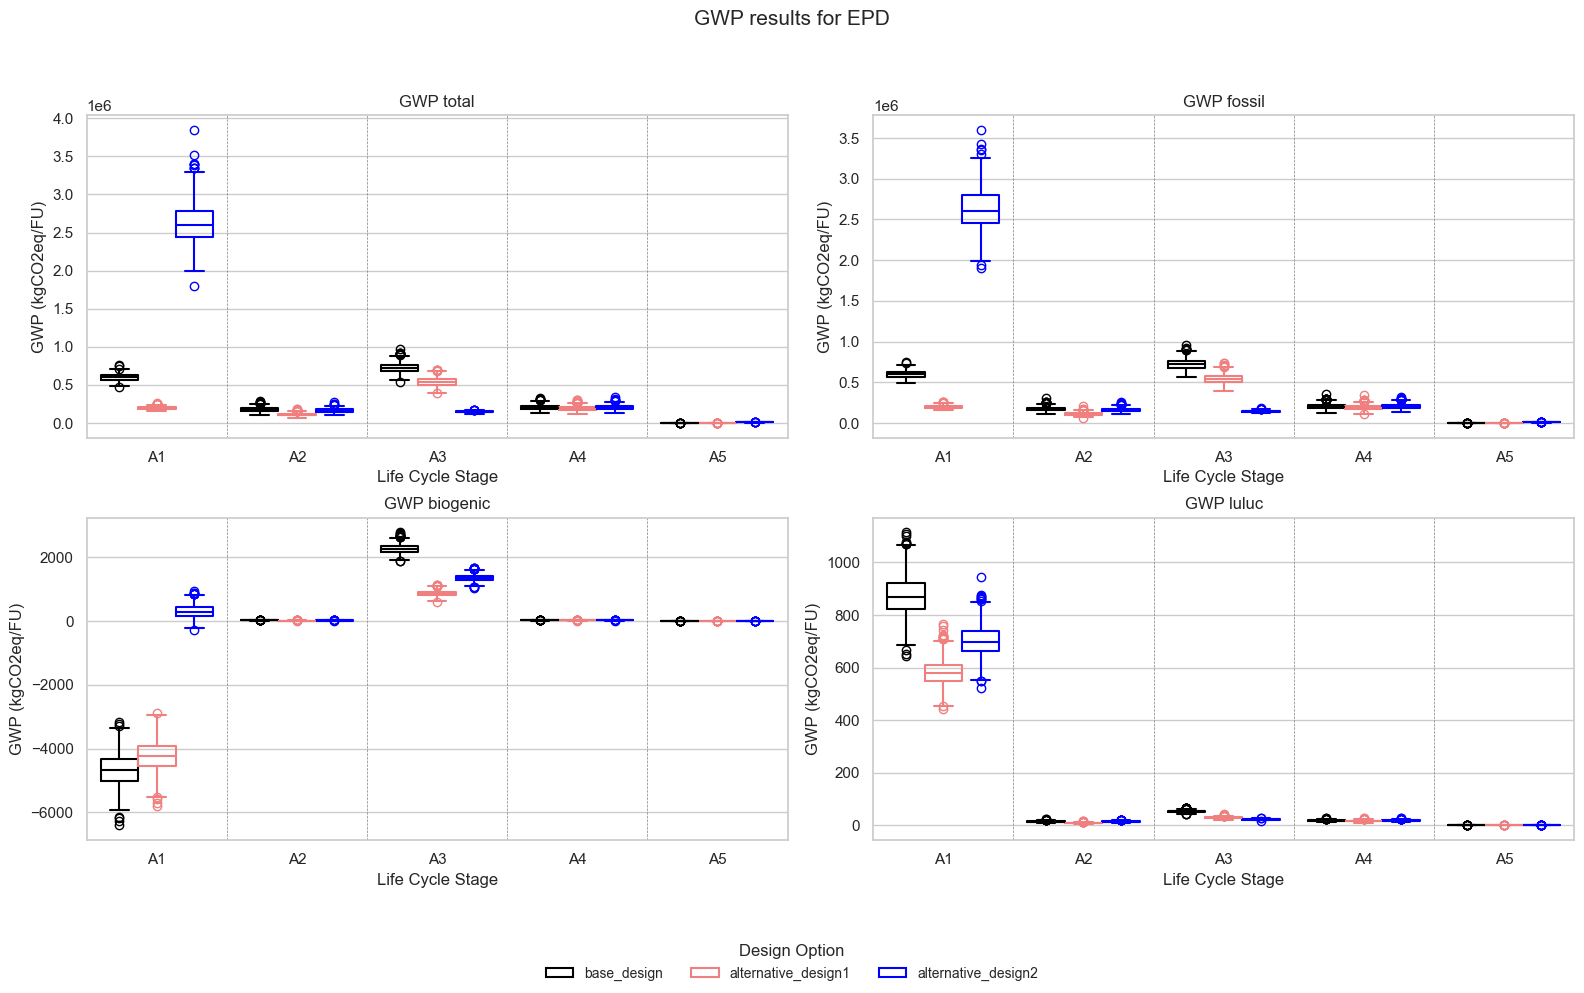

In [9]:
## single plot for each database results for A1 to A5 for each impact category
plot_gwp_boxplots_aggregated(aggregated_db1_results, 'ecoinvent')
plot_gwp_boxplots_aggregated(aggregated_db2_results, 'ökobaudat')
plot_gwp_boxplots_aggregated(aggregated_db3_results, 'EPD')

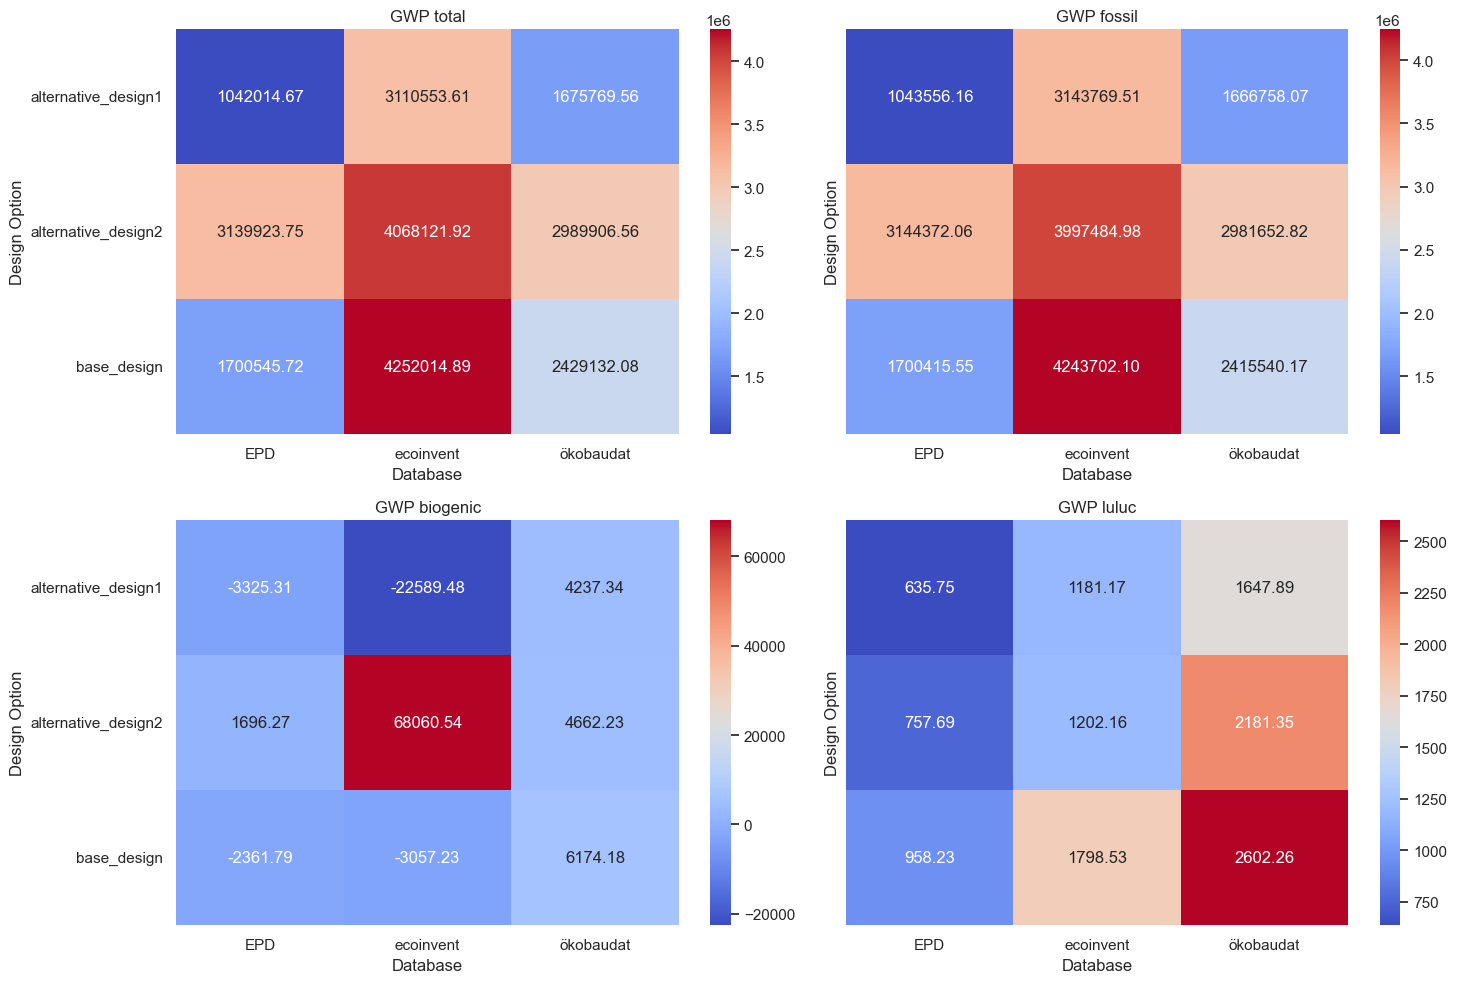

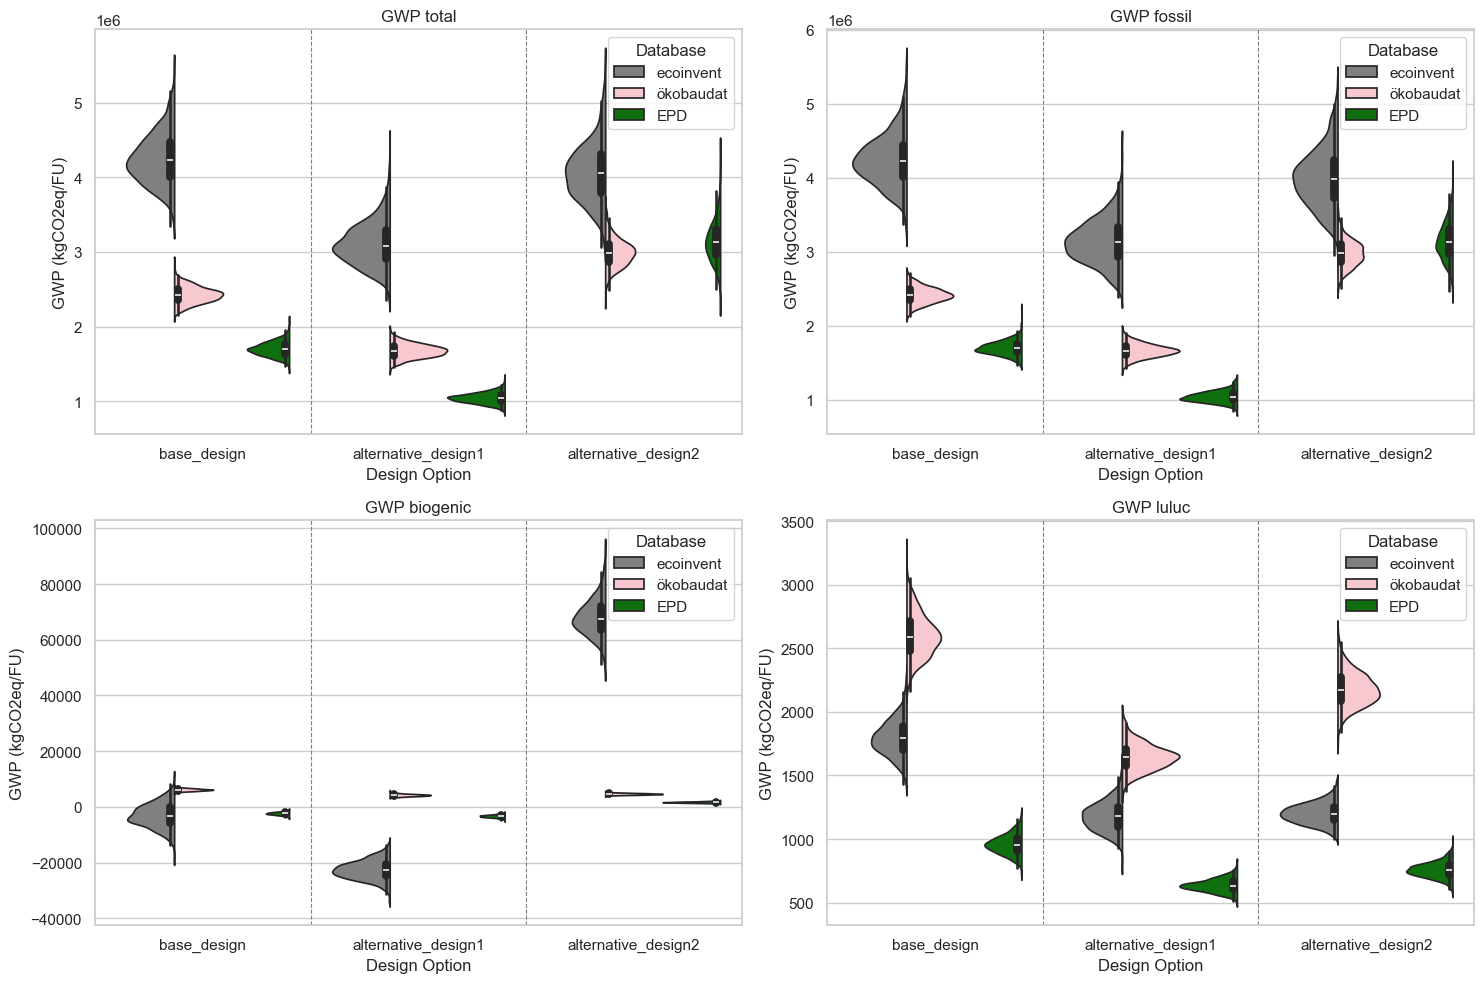

In [10]:
plot_heatmaps(combined_df)
# radar plot probably makes no sense as A1 is with huge distance the highest contributor to the overall impact
# plot_radar(aggregated_db1_results, "ecoinvent")
plot_violin(boxplot_combined_data)

In [11]:
## test the comparison of the manual, deterministic and probabilistic results
## manual results
## A1 gwp-total = 1324073
## A3 gwp-total = 726457.3588

## deterministic results
## Deterministic LCA on layer level and design option level - ÖKOBAUDAT
deterministic_lca_calculator = LCACalculator(layers, emission_factors_national)
deterministic_lca_calculator.calculate_stage_impacts()
deterministic_layer_results = deterministic_lca_calculator.get_results()
deterministic_design_option_results_national = deterministic_lca_calculator.calculate_deterministic_lca_design_option(deterministic_layer_results, design_options, length_road=3.39)
print(deterministic_design_option_results_national)

## manual vs. deterministic
print(round(deterministic_design_option_results_national[0].a1_result.gwp_total, 2))
print(round(deterministic_design_option_results_national[0].a1_result.gwp_total/1324073, 2))
print(round(deterministic_design_option_results_national[0].a3_result.gwp_total, 2))
print(round(deterministic_design_option_results_national[0].a3_result.gwp_total/726457, 2))

## manual vs probabilistic
print(np.mean(aggregated_db2_results["base_design"]["A1"]["gwp_total"]))
print(round(np.mean(aggregated_db2_results["base_design"]["A1"]["gwp_total"])/1324073, 2))
print(np.mean(aggregated_db2_results["base_design"]["A3"]["gwp_total"]))
print(round(np.mean(aggregated_db2_results["base_design"]["A3"]["gwp_total"])/726457.36, 2))

## deterministic vs probabilistic
print(round(deterministic_design_option_results_national[0].a1_result.gwp_total/np.mean(aggregated_db2_results["base_design"]["A1"]["gwp_total"]),2))
print(round(deterministic_design_option_results_national[0].a3_result.gwp_total/np.mean(aggregated_db2_results["base_design"]["A3"]["gwp_total"]),2))

[DesignOptionResult(name='base_design', a1_result=A1Result(gwp_total=1324142.9994002974, gwp_fossil=1317801.6100011186, gwp_biogenic=3863.8511687876817, gwp_luluc=2520.2305338843184), a2_result=A2Result(gwp_total=171830.17792957166, gwp_fossil=171783.68708056473, gwp_biogenic=19.99106507297506, gwp_luluc=14.644617437179404), a3_result=A3Result(gwp_total=726457.3588184708, gwp_fossil=724093.1283453238, gwp_biogenic=2274.451835231915, gwp_luluc=53.87739717206655), a4_result=A4Result(gwp_total=201549.14714336282, gwp_fossil=201494.61544770712, gwp_biogenic=23.44862913193885, gwp_luluc=17.177484131536602), a5_result=A5Result(gwp_total=1778.8133838209267, gwp_fossil=1778.332103143486, gwp_biogenic=0.20695069129951255, gwp_luluc=0.15160341339382896)), DesignOptionResult(name='alternative_design1', a1_result=A1Result(gwp_total=828931.1615090123, gwp_fossil=824068.8004573593, gwp_biogenic=3326.185961130903, gwp_luluc=1590.6338569185134), a2_result=A2Result(gwp_total=110924.2155328566, gwp_foss